In [10]:
%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [11]:
import numpy as np
import matplotlib.pyplot as plt

# DQN

In [12]:
from src.OED import OED, OEDGymConfig
from src.DQN import DQN_OED

from pde.AdvectionEquation import *
from pde.Burgers2D import *
from pde.AdvectionDiffusionReaction import *

## Advection Equation

In [13]:
seed = 0
adv_config = Adv2dModelConfig()
adv_eq = Advection2D(adv_config)

In [19]:
gym_config = OEDGymConfig()
gym_config.n_max = 500
gym_config.max_horizon = 500
adv_dqn = DQN_OED(seed, pde_system=adv_eq, gym_config=gym_config, verbose=1)

Using cpu device
Wrapping the env with a `Monitor` wrapper
Wrapping the env in a DummyVecEnv.


In [20]:
adv_dqn.env.pde_field.shape

(50, 50, 21)

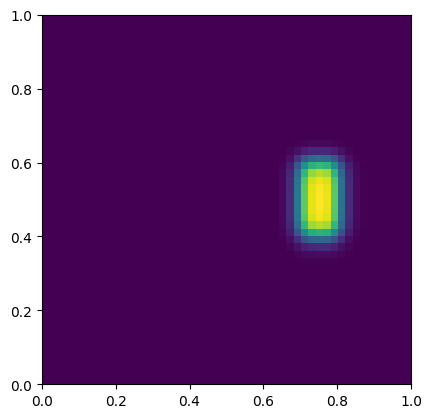

In [21]:
plt.imshow(adv_dqn.env.pde_field[:, :, 20], origin='lower', extent=[0, 1, 0, 1])

In [22]:
model_name = "adv_dqn_2"
adv_dqn.train(model_name, total_timesteps=50000, log_interval=10)

Logging to ./tensorboard/DQN_40
----------------------------------
| rollout/            |          |
|    ep_len_mean      | 501      |
|    ep_rew_mean      | -inf     |
|    exploration_rate | 0.05     |
| time/               |          |
|    episodes         | 10       |
|    fps              | 820      |
|    time_elapsed     | 6        |
|    total_timesteps  | 5010     |
| train/              |          |
|    learning_rate    | 0.0001   |
|    loss             | inf      |
|    n_updates        | 1227     |
----------------------------------
----------------------------------
| rollout/            |          |
|    ep_len_mean      | 501      |
|    ep_rew_mean      | -inf     |
|    exploration_rate | 0.05     |
| time/               |          |
|    episodes         | 20       |
|    fps              | 760      |
|    time_elapsed     | 13       |
|    total_timesteps  | 10020    |
| train/              |          |
|    learning_rate    | 0.0001   |
|    loss             |

In [ ]:
print(self.N, self.t, done)

In [9]:
adr_all_ep_rewards, adr_best_rewards, adr_optimal_states_all = adv_dqn.evaluate(num_episodes=1000)

Starting episode 1/1000
  Step 1, Current reward: -inf
  Step 2, Current reward: -inf
  Step 3, Current reward: -inf
  Step 4, Current reward: -inf
  Step 5, Current reward: -inf
  Step 6, Current reward: -inf
  Step 7, Current reward: -inf
  Step 8, Current reward: -inf
  Step 9, Current reward: -inf
  Step 10, Current reward: -inf
  Step 11, Current reward: -inf
  Step 12, Current reward: -inf
  Step 13, Current reward: -inf
  Step 14, Current reward: -inf
  Step 15, Current reward: -inf
  Step 16, Current reward: -inf
  Step 17, Current reward: -inf
  Step 18, Current reward: -inf
  Step 19, Current reward: -inf
  Step 20, Current reward: -inf
  Step 21, Current reward: -inf
  Step 22, Current reward: -inf
  Step 23, Current reward: -inf
  Step 24, Current reward: -inf
  Step 25, Current reward: -inf
  Step 26, Current reward: -inf
  Step 27, Current reward: -inf
  Step 28, Current reward: -inf
  Step 29, Current reward: -inf
  Step 30, Current reward: -inf
  Step 31, Current reward

KeyboardInterrupt: 

## Burgers Equation

In [ ]:
seed = 0
ib_config = Burgers2DConfig()
ib_eq = Burgers2D(ib_config)

In [ ]:
gym_config = OEDGymConfig()
ib_dqn = DQN_OED(seed, pde_system=ib_eq, gym_config=gym_config, verbose=1)

In [ ]:
model_name = "ib_dqn_1"
ib_dqn.train(model_name, total_timesteps=50000, log_interval=100)

In [ ]:
ib_all_ep_rewards, ib_best_rewards, ib_optimal_states_all = ib_dqn.evaluate(num_episodes=100)

## Advection Diffusion Reaction Equation

In [4]:
seed = 0
adr_config = ADRConfig()
adr_eq = ADR(adr_config)

In [7]:
gym_config = OEDGymConfig()
gym_config.n_sensor = 2
adr_dqn = DQN_OED(seed, pde_system=adr_eq, gym_config=gym_config, verbose=1)

Using cpu device
Wrapping the env with a `Monitor` wrapper
Wrapping the env in a DummyVecEnv.


In [8]:
model_name = "adr_dqn_1"
adr_dqn.train(model_name, total_timesteps=5000, log_interval=100)

Logging to ./tensorboard/DQN_28
----------------------------------
| rollout/            |          |
|    ep_len_mean      | 5.74     |
|    ep_rew_mean      | -138     |
|    exploration_rate | 0.05     |
| time/               |          |
|    episodes         | 100      |
|    fps              | 755      |
|    time_elapsed     | 0        |
|    total_timesteps  | 574      |
| train/              |          |
|    learning_rate    | 0.0001   |
|    loss             | 22.6     |
|    n_updates        | 118      |
----------------------------------
----------------------------------
| rollout/            |          |
|    ep_len_mean      | 1        |
|    ep_rew_mean      | -23.9    |
|    exploration_rate | 0.05     |
| time/               |          |
|    episodes         | 200      |
|    fps              | 709      |
|    time_elapsed     | 0        |
|    total_timesteps  | 674      |
| train/              |          |
|    learning_rate    | 0.0001   |
|    loss             |

In [ ]:
adr_all_ep_rewards, adr_best_rewards, adr_optimal_states_all = adr_dqn.evaluate(num_episodes=100)

## Plots

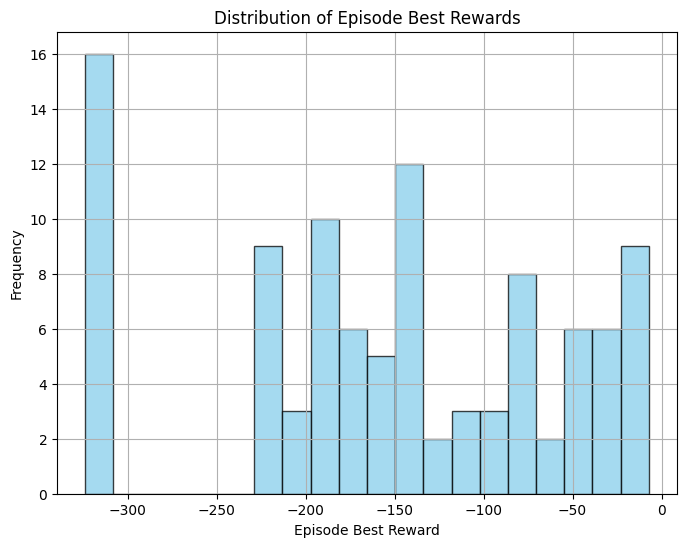

In [44]:
plt.figure(figsize=(8, 6))
plt.hist(adr_best_rewards, bins=20, color='skyblue', edgecolor='black', alpha=0.75)
plt.xlabel('Episode Best Reward')
plt.ylabel('Frequency')
plt.title('Distribution of Episode Best Rewards')
plt.grid(True)
plt.show()

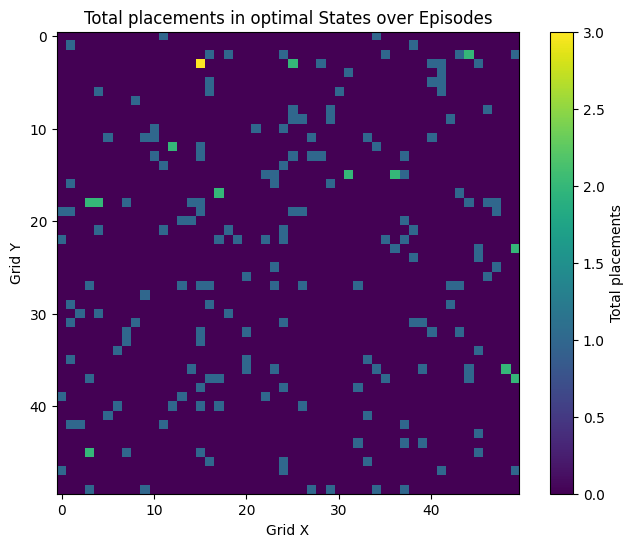

In [45]:
# Compute sum of optimal_states over all episodes
# Assumes that each info["optimal_states"] is a numpy array of the same shape
optimal_states_stack = np.array(adr_optimal_states_all)
mean_optimal_states = np.sum(optimal_states_stack, axis=0)

# Plot grid of mean optimal_states
plt.figure(figsize=(8, 6))
plt.imshow(mean_optimal_states, cmap='viridis', interpolation='nearest')
plt.title('Total placements in optimal States over Episodes')
plt.colorbar(label='Total placements')
plt.xlabel('Grid X')
plt.ylabel('Grid Y')
plt.show()